In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

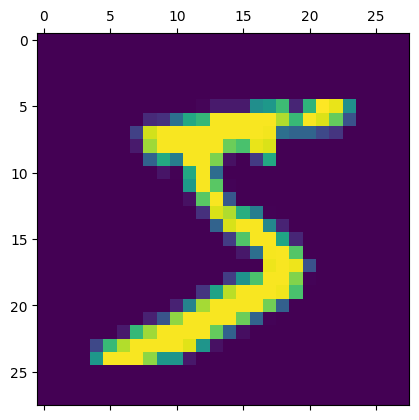

In [4]:
plt.matshow(x_train[0])

In [5]:
y_train[0]

5

In [6]:
x_test[0]
# 2D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
x_train.shape


(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_train = x_train/255
x_test = x_test/255
# scaling the value for accuracy

In [10]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)


In [11]:
x_train_flattened[0]
# 1D array for neural network

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
# defining neural network

soham = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

soham.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

soham.fit(x_train_flattened,y_train,epochs=5)

C:\Users\Soham Tapse\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.8139 - loss: 0.7233
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.9138 - loss: 0.3071
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - accuracy: 0.9209 - loss: 0.2799
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.9221 - loss: 0.2744
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.9257 - loss: 0.2728


In [13]:
soham.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9156 - loss: 0.3008


[0.26390042901039124, 0.9265999794006348]

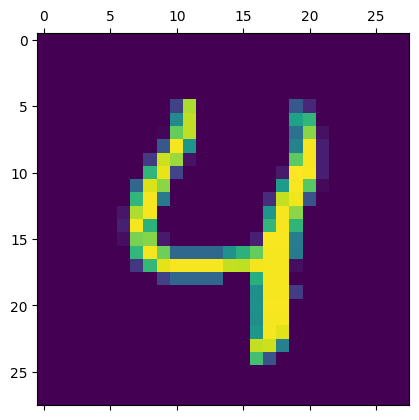

In [14]:
plt.matshow(x_test[4])

In [15]:
y_predicted = soham.predict(x_test_flattened)
output = y_predicted[4]
np.argmax(output)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step


4

In [16]:
y_predicted_lables = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_lables)

Text(95.72222222222221, 0.5, 'Truth')

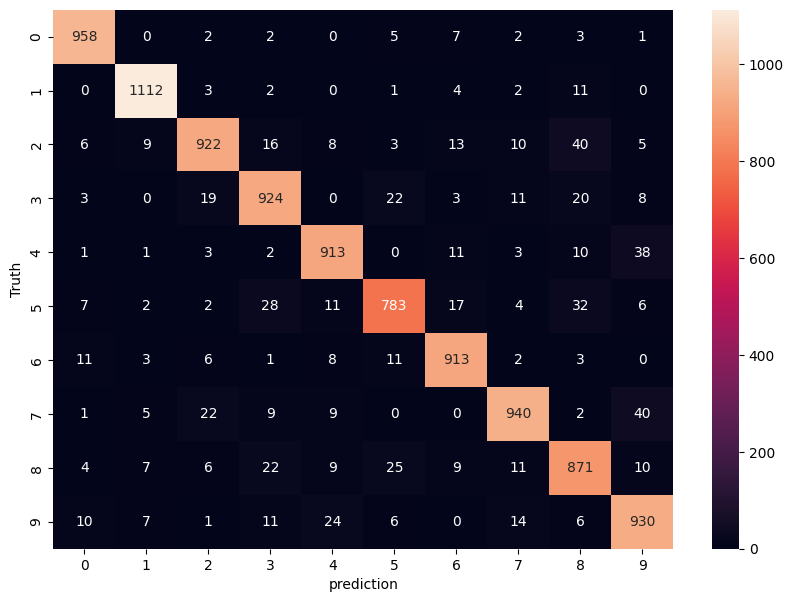

In [17]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('Truth')